In [1]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import folium
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dir_path = os.path.dirname(os.path.abspath("__file__")) + "/data"
dfs = {}
for file in os.listdir(dir_path):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        #print('Filename :', filename)
        file_name = os.path.join(dir_path, filename)
        df = pd.read_csv(file_name)
        dfs[f'{filename}'] = df
        print('No of rows', df.shape[0])
        print('Column names\n', list(df))
        print('\n\n')
        

No of rows 84090
Column names
 ['Job.ID', 'Provider', 'Status', 'Slug', 'Title', 'Position', 'Company', 'City', 'State.Name', 'State.Code', 'Address', 'Latitude', 'Longitude', 'Industry', 'Job.Description', 'Requirements', 'Salary', 'Listing.Start', 'Listing.End', 'Employment.Type', 'Education.Required', 'Created.At', 'Updated.At']



No of rows 12370
Column names
 ['Applicant.ID', 'Job.ID', 'Title', 'Position', 'Company', 'City', 'State.Name', 'State.Code', 'Industry', 'View.Start', 'View.End', 'View.Duration', 'Created.At', 'Updated.At']



No of rows 84090
Column names
 ['Unnamed: 0', 'Job.ID', 'text']



No of rows 6560
Column names
 ['Applicant.ID', 'Position.Of.Interest', 'Created.At', 'Updated.At']



No of rows 8653
Column names
 ['Applicant.ID', 'Position.Name', 'Employer.Name', 'City', 'State.Name', 'State.Code', 'Start.Date', 'End.Date', 'Job.Description', 'Salary', 'Can.Contact.Employer', 'Created.At', 'Updated.At']





In [3]:
dfs.keys()

dict_keys(['Combined_Jobs_Final.csv', 'Job_Views.csv', 'job_data.csv', 'Positions_Of_Interest.csv', 'Experience.csv'])

In [4]:
combined_jobs = dfs['Combined_Jobs_Final.csv']
combined_jobs

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84085,82,1,open,san-francisco-ca-national-japanese-american-hi...,Book Keeper @ National Japanese American Histo...,Book Keeper,National Japanese American Historical Society,San Francisco,California,CA,...,Office Administration,NJAHS stands for National Japanese American Hi...,NaN,20.00,NaN,NaN,Part-Time,NaN,2013-03-20 06:35:01 UTC,2014-08-16 15:35:27 UTC
84086,83,1,open,larkspur-ca-emporio-rulli-kitchen-staff-chef,Kitchen Staff/Chef @ Emporio Rulli,Kitchen Staff/Chef,Emporio Rulli,Larkspur,California,CA,...,Food and Beverages,Weekend Brunch Line Cook \r\n● Other shifts ma...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-03-20 08:06:43 UTC,2014-08-16 15:35:27 UTC
84087,84,1,open,san-francisco-ca-onigilly-driver-84,Driver @ Onigilly,Driver,Onigilly,San Francisco,California,CA,...,Food and Beverages,ONIGILLY (Japanese rice ball wraps) seeks outg...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-03-12 01:47:13 UTC,2014-08-16 15:35:27 UTC
84088,88,1,open,san-francisco-ca-machka-restaurants-corp-line-...,Line Cook @ Machka Restaurants Corp.,Line Cook,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean restaurant in F...,NaN,13.00,NaN,NaN,Part-Time,NaN,2013-07-16 08:55:22 UTC,2014-08-16 15:35:28 UTC


In [5]:
list(combined_jobs)

['Job.ID',
 'Provider',
 'Status',
 'Slug',
 'Title',
 'Position',
 'Company',
 'City',
 'State.Name',
 'State.Code',
 'Address',
 'Latitude',
 'Longitude',
 'Industry',
 'Job.Description',
 'Requirements',
 'Salary',
 'Listing.Start',
 'Listing.End',
 'Employment.Type',
 'Education.Required',
 'Created.At',
 'Updated.At']

In [6]:
job_views = dfs['Job_Views.csv']
job_views

,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC
2,10001,84141,Part Time Showroom Sales / Cashier @ Grizzly I...,Part Time Showroom Sales / Cashier,Grizzly Industrial Inc.,Bellingham,Washington,WA,NaN,2014-12-12 20:12:32 UTC,2014-12-12 20:17:18 UTC,286.0,2014-12-12 20:12:32 UTC,2014-12-12 20:12:32 UTC
3,10002,77989,Event Specialist Part Time @ Advantage Sales &...,Event Specialist Part Time,Advantage Sales & Marketing,Simpsonville,South Carolina,SC,NaN,2014-12-12 20:39:23 UTC,2014-12-12 20:42:13 UTC,170.0,2014-12-12 20:39:23 UTC,2014-12-12 20:39:23 UTC
4,10002,69568,Bonefish - Kitchen Staff @ Bonefish Grill,Bonefish - Kitchen Staff,Bonefish Grill,Greenville,South Carolina,SC,NaN,2014-12-12 20:43:25 UTC,2014-12-12 20:43:58 UTC,33.0,2014-12-12 20:43:25 UTC,2014-12-12 20:43:25 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12365,9997,166,Server @ A La Turca,Server,A La Turca,San Francisco,California,CA,Food and Beverages,2014-12-12 21:00:10 UTC,2014-12-12 21:00:25 UTC,14.0,2014-12-12 21:00:10 UTC,2014-12-12 21:00:10 UTC
12366,9997,531,Server @ Oola Restaurant & Bar,Server,Oola Restaurant & Bar,San Francisco,California,CA,Food and Beverages,2014-12-12 21:00:47 UTC,2014-12-12 21:00:58 UTC,10.0,2014-12-12 21:00:47 UTC,2014-12-12 21:00:47 UTC
12367,9997,33,Server @ Haven,Server,Haven,Oakland,California,CA,Food and Beverages,2014-12-12 21:01:20 UTC,2014-12-12 21:01:26 UTC,5.0,2014-12-12 21:01:20 UTC,2014-12-12 21:01:20 UTC
12368,9997,517,Server @ SAM's Diner,Server,SAM's Diner,San Francisco,California,CA,Food and Beverages,2014-12-12 21:02:07 UTC,2014-12-12 21:02:17 UTC,10.0,2014-12-12 21:02:07 UTC,2014-12-12 21:02:07 UTC


In [7]:
jobs_data = dfs['job_data.csv']
jobs_data

,Unnamed: 0,Job.ID,text
0,0,111,server tacolici palo alto part time tacolici f...
1,1,113,kitchen staff chef claud lane san francisco pa...
2,2,117,bartend machka restaur corp. san francisco par...
3,3,121,server teriyaki hous brisban part time serv fo...
4,4,127,kitchen staff chef rosa mexicano sunset lo ang...
...,...,...,...
84085,84085,82,book keeper nation japanes american histor soc...
84086,84086,83,kitchen staff chef emporio rulli larkspur part...
84087,84087,84,driver onigilli san francisco part time onigil...
84088,84088,88,line cook machka restaur corp. san francisco p...


In [8]:
experience = dfs['Experience.csv']
experience

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
2,10001,Machine Operator,comptec inc,Custer,Washington,WA,1997-01-01,1999-01-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
3,10003,maintenance technician,Winn residental,washington,District of Columbia,DC,NaN,NaN,"Necessary maintenance for ""Make Ready"" Plumbin...",10.00,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC
4,10003,Electrical Helper,michael and son services,alexandria,Virginia,VA,NaN,NaN,repair and services of electrical construction,NaN,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,9997,Server,Biscuits and blues,San Francisco,California,CA,2014-04-08,NaN,I am a cocktail waitress. Its a high volume bl...,11.00,False,2014-12-12 19:09:40 UTC,2014-12-12 20:22:16 UTC
8649,9997,server,Knickerbocker Bar and Grill,New York,New York,NY,2011-06-01,2014-01-01,It was a popular restaurant in the west villag...,5.00,False,2014-12-12 19:09:40 UTC,2014-12-12 20:22:16 UTC
8650,9997,Server/Cocktail Server/Bartender,The Park,New York,New York,NY,2010-04-01,2011-10-01,"I was a dining room server, a cocktail server,...",4.65,True,2014-12-12 20:22:16 UTC,2014-12-12 20:54:21 UTC
8651,9997,Server/cocktail server/bartender,The River Room,New York,New York,NY,2008-08-01,2010-10-01,This was an establishment that majority of the...,25.00,True,2014-12-12 20:54:21 UTC,2014-12-12 20:54:21 UTC


In [9]:
positions_interest = dfs['Positions_Of_Interest.csv']
positions_interest

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
0,10003,security officer,2014-12-12 21:20:54 UTC,2014-12-12 21:20:54 UTC
1,10007,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
2,10007,Bartender,2014-08-14 15:56:44 UTC,2015-02-19 23:21:28 UTC
3,10008,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
4,10008,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
...,...,...,...,...
6555,9995,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
6556,9996,Security,2014-12-12 19:06:28 UTC,2014-12-12 19:06:28 UTC
6557,9997,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
6558,9997,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC


# EDA

## Check NA's
## Check data types

# Key Findings


1. NA values in Industry and Salary
2. Unique Identifiers - 
   Combined_Jobs_Final - Job.ID
   Positions_of_Interest - (Applicant.ID,Position.Of.Interest)
   Experience - ('Applicant.ID', 'Position.Name', 'City', 'Employer.Name', 'Start.Date', 'End.Date')
   Job Views - ('Applicant.ID', 'Job.ID', 'View.Start', 'View.End')
3. Duplicates found in unique identifiers in
   Job Views
   experience

# Duplicates

In [52]:
experience[experience.duplicated(subset=['Applicant.ID', 'Position.Name', 'City', 'Employer.Name', 'Start.Date', 'End.Date'], keep=False)]

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
905,12211,NaN,National Underwriter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-14 02:31:33 UTC,2015-01-14 02:31:33 UTC
907,12211,NaN,National Underwriter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-14 02:31:33 UTC,2015-01-14 02:31:33 UTC
908,12211,NaN,National Underwriter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-14 02:31:33 UTC,2015-01-14 02:31:33 UTC
1205,13098,Licensed Clinical Social Worker,Jennifer Scott Counseling,NaN,NaN,NaN,1987-06-01,NaN,"I provide counseling to individuals, couples a...",NaN,NaN,2015-02-12 23:57:17 UTC,2015-02-12 23:57:17 UTC
1206,13098,Licensed Clinical Social Worker,Jennifer Scott Counseling,NaN,NaN,NaN,1987-06-01,NaN,NaN,NaN,NaN,2015-02-12 23:57:17 UTC,2015-02-12 23:57:17 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,8356,Sales Associate,Macy's,NaN,NaN,NaN,2014-04-01,2014-08-31,"Greeted customers, Sell merchandise using sale...",NaN,NaN,2014-11-21 06:48:04 UTC,2014-11-21 06:48:04 UTC
7736,8556,Press Brake Operator,Readng Truck Body,Crestview,Florida,FL,2005-07-01,2014-10-22,Responsibilities:\r\n•\tBend and form all meta...,16.2,True,2014-11-23 19:50:44 UTC,2014-11-23 19:50:44 UTC
7737,8556,Press Brake Operator,Readng Truck Body,Crestview,Florida,FL,2005-07-01,2014-10-22,Responsibilities:\r\n•\tBend and form all meta...,16.2,True,2014-11-23 19:53:39 UTC,2014-11-23 19:53:39 UTC
7962,8798,Account Manager,Computer Support Corp,NaN,NaN,NaN,1995-09-01,1998-06-30,"Developed, captured and maintained new busines...",NaN,NaN,2014-11-26 17:55:32 UTC,2014-11-26 17:55:32 UTC


In [51]:
job_views[job_views.duplicated(subset=['Applicant.ID', 'Job.ID', 'View.Start', 'View.End'], keep=False)]

,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
1329,10703,162363,CASHIER @ Murphy USA,CASHIER,Murphy USA,Grand Haven,Michigan,MI,NaN,2014-12-25 19:02:35 UTC,NaN,NaN,2014-12-25 19:02:35 UTC,2014-12-25 19:02:35 UTC
1331,10703,162363,CASHIER @ Murphy USA,CASHIER,Murphy USA,Grand Haven,Michigan,MI,NaN,2014-12-25 19:02:35 UTC,NaN,NaN,2014-12-25 19:02:35 UTC,2014-12-25 19:02:35 UTC
5973,13053,168732,Outside Sales Representative @ Slingshot Conne...,Outside Sales Representative,Slingshot Connections,San Jose,California,CA,NaN,2015-01-22 23:10:45 UTC,NaN,NaN,2015-01-22 23:10:45 UTC,2015-01-22 23:10:45 UTC
5974,13053,168732,Outside Sales Representative @ Slingshot Conne...,Outside Sales Representative,Slingshot Connections,San Jose,California,CA,NaN,2015-01-22 23:10:45 UTC,NaN,NaN,2015-01-22 23:10:45 UTC,2015-01-22 23:10:45 UTC
9166,6739,8463,Warehouse Assitant Manager @ Beyond Limits,Warehouse Assitant Manager,Beyond Limits,San Clemente,California,CA,Manufacturing & Production,2014-11-06 22:48:25 UTC,NaN,NaN,2014-11-06 22:48:25 UTC,2014-11-06 22:48:25 UTC
9167,6739,8463,Warehouse Assitant Manager @ Beyond Limits,Warehouse Assitant Manager,Beyond Limits,San Clemente,California,CA,Manufacturing & Production,2014-11-06 22:48:25 UTC,NaN,NaN,2014-11-06 22:48:25 UTC,2014-11-06 22:48:25 UTC
9172,6739,33622,Production Design Assistant @ Teacher Created ...,Production Design Assistant,"Teacher Created Materials, Inc.",Huntington Beach,California,CA,Media & Communication,2014-11-06 22:48:34 UTC,NaN,NaN,2014-11-06 22:48:34 UTC,2014-11-06 22:48:34 UTC
9174,6739,33622,Production Design Assistant @ Teacher Created ...,Production Design Assistant,"Teacher Created Materials, Inc.",Huntington Beach,California,CA,Media & Communication,2014-11-06 22:48:34 UTC,NaN,NaN,2014-11-06 22:48:34 UTC,2014-11-06 22:48:34 UTC
9179,6739,31085,Intern - Support Services - Helpdesk @ Pacific...,Intern - Support Services - Helpdesk,Pacific Sunwear of California Inc,Anaheim,California,CA,Information Technology,2014-11-06 22:48:42 UTC,NaN,NaN,2014-11-06 22:48:42 UTC,2014-11-06 22:48:42 UTC
9180,6739,31085,Intern - Support Services - Helpdesk @ Pacific...,Intern - Support Services - Helpdesk,Pacific Sunwear of California Inc,Anaheim,California,CA,Information Technology,2014-11-06 22:48:42 UTC,NaN,NaN,2014-11-06 22:48:42 UTC,2014-11-06 22:48:42 UTC


In [53]:
positions_interest[positions_interest.duplicated(subset=['Applicant.ID', 'Position.Of.Interest'], keep=False)]

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At,new_positions_of_interest
1412,2254,"supervisor, adminstration",2014-09-12 22:16:22 UTC,2014-09-12 22:16:22 UTC,"supervisor, adminstration"
1413,2254,"supervisor, adminstration",2014-09-12 22:16:23 UTC,2014-09-12 22:16:23 UTC,"supervisor, adminstration"
1414,2254,"supervisor, adminstration",2014-09-12 22:16:23 UTC,2014-09-12 22:16:23 UTC,"supervisor, adminstration"
1415,2254,"supervisor, adminstration",2014-09-12 22:16:23 UTC,2014-09-12 22:16:23 UTC,"supervisor, adminstration"
1416,2254,"supervisor, adminstration",2014-09-12 22:16:23 UTC,2014-09-12 22:16:23 UTC,"supervisor, adminstration"
1417,2254,"supervisor, adminstration",2014-09-12 22:16:25 UTC,2014-09-12 22:16:25 UTC,"supervisor, adminstration"
1418,2254,"supervisor, adminstration",2014-09-12 22:16:27 UTC,2014-09-12 22:16:27 UTC,"supervisor, adminstration"
1419,2254,"supervisor, adminstration",2014-09-12 22:16:29 UTC,2014-09-12 22:16:29 UTC,"supervisor, adminstration"
1420,2254,"supervisor, adminstration",2014-09-12 22:16:29 UTC,2014-09-12 22:16:29 UTC,"supervisor, adminstration"
1421,2254,"supervisor, adminstration",2014-09-12 22:16:29 UTC,2014-09-12 22:16:29 UTC,"supervisor, adminstration"


In [10]:
combined_jobs.isna().any()

Job.ID                False
Provider              False
Status                False
Slug                  False
Title                 False
Position              False
Company                True
City                   True
State.Name             True
State.Code             True
Address                True
Latitude              False
Longitude             False
Industry               True
Job.Description        True
Requirements           True
Salary                 True
Listing.Start          True
Listing.End            True
Employment.Type        True
Education.Required     True
Created.At            False
Updated.At            False
dtype: bool

In [11]:
combined_jobs.dtypes

Job.ID                  int64
Provider                int64
Status                 object
Slug                   object
Title                  object
Position               object
Company                object
City                   object
State.Name             object
State.Code             object
Address                object
Latitude              float64
Longitude             float64
Industry               object
Job.Description        object
Requirements          float64
Salary                float64
Listing.Start          object
Listing.End            object
Employment.Type        object
Education.Required     object
Created.At             object
Updated.At             object
dtype: object

# Visualize data

## Salary Range by Industry

### Note: Missing industry and salary values are discarded

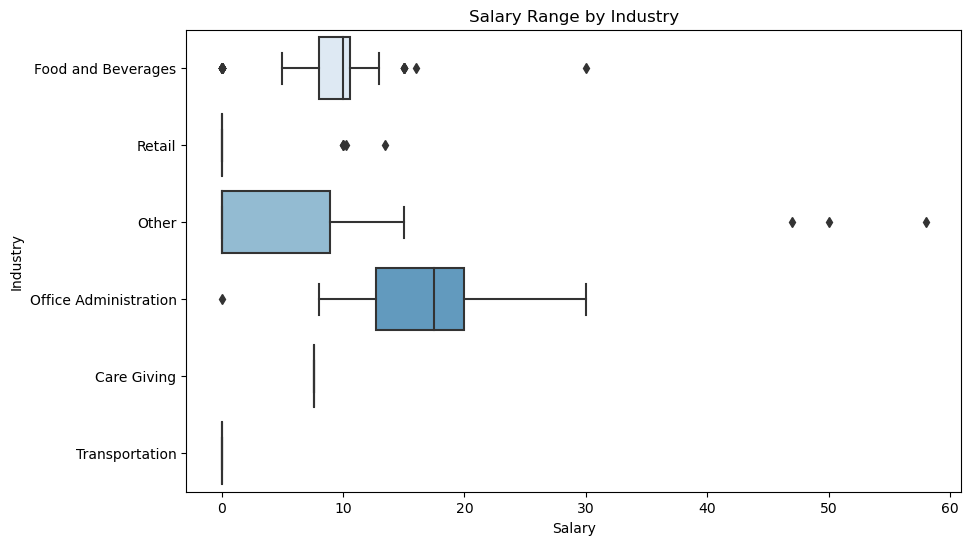

In [12]:
job_master = combined_jobs.dropna(subset=['Salary', 'Industry'])

#job_master = combined_jobs.copy()
#job_master['Industry'] = job_master['Industry'].fillna('Unknown')

plt.figure(figsize=(10, 6))
sns.boxplot( x=job_master["Salary"], y=job_master['Industry'], palette="Blues");

# Add labels and title
plt.xlabel("Salary")
plt.ylabel("Industry")
plt.title("Salary Range by Industry")

# Show the plot
plt.show()

# No. of Jobs by Industry

### Note: Missing industry  values are discarded

In [13]:
jobs_by_industry = job_master.groupby('Industry').agg({'Job.ID': ['count']})

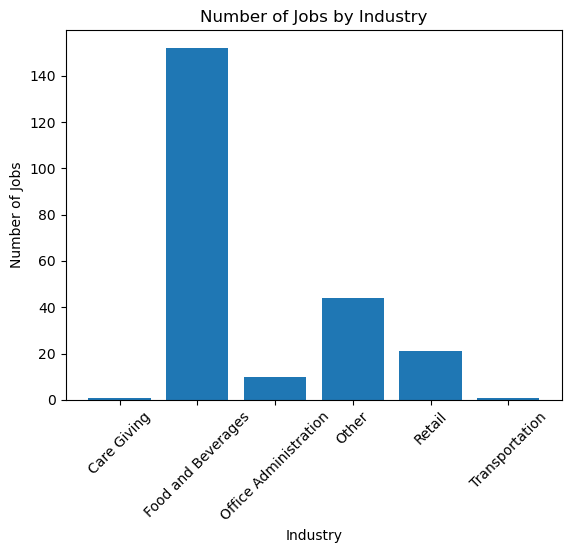

In [14]:
# Reset column names for easier access
jobs_by_industry.columns = ['Count']

# Plot the bar graph
plt.bar(jobs_by_industry.index, jobs_by_industry['Count'])

# Add labels and title
plt.xlabel("Industry")
plt.ylabel("Number of Jobs")
plt.title("Number of Jobs by Industry")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Locations of Jobs

In [15]:
combined_jobs1 = combined_jobs.loc[(combined_jobs['Latitude'] != 0) & (combined_jobs['Longitude'] != 0)]
combined_jobs1
# Create a map centered on a location
map_center = [combined_jobs1['Latitude'].mean(), combined_jobs1['Longitude'].mean()]  # Centered based on average coordinates
zoom_level = 5  # Adjust the zoom level as desired
map_obj = folium.Map(location=map_center, zoom_start=zoom_level)

# Add markers for each location
for _, row in combined_jobs1.iloc[:1000].iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=row['City']).add_to(map_obj)

# Display the map
map_obj

# Calculate number of jobs for each industry and employment type



/Users/arjun/miniforge3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


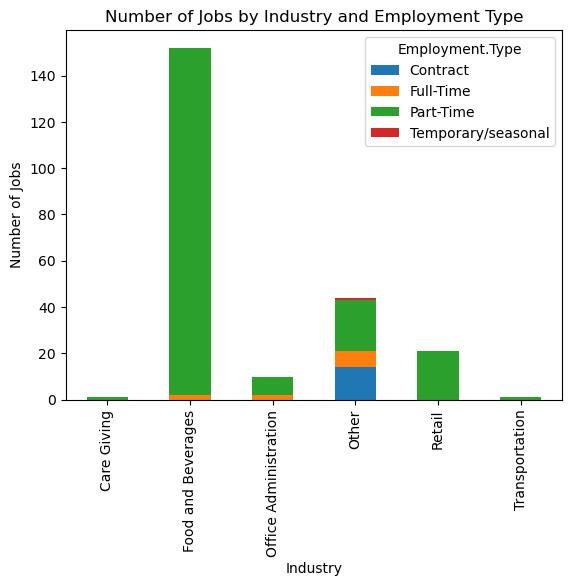

In [16]:
# Calculate number of jobs for each industry and employment type
job_master['Employment.Type'] = job_master['Employment.Type'].fillna('Unknown')
jobs_by_industry = job_master.groupby(['Industry', 'Employment.Type']).size().unstack()

# Plot the bar graph
jobs_by_industry.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs by Industry and Employment Type')

# Show the plot
plt.show()

# Most No. of Jobs in a city

In [17]:
gdf = combined_jobs.groupby('City').agg({'Job.ID': ['count']})
gdf.columns = ['Jobs Count']
gdf

,Jobs Count
City,
Abbeville,2
Abbottstown,2
Aberdeen,37
Abilene,20
Abingdon,35
...,...
Zephyr,1
Zephyrhills,19
Zion,2


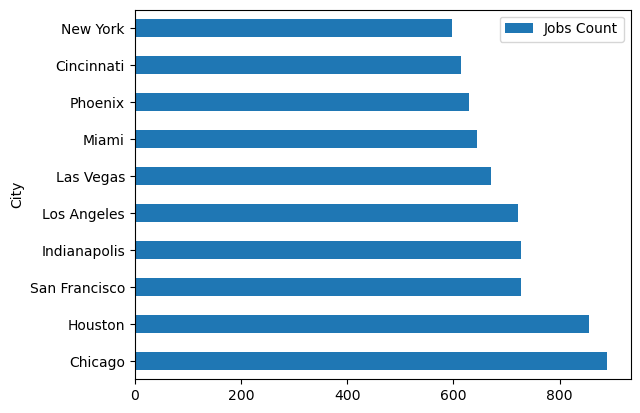

In [18]:
gdf.sort_values(by=['Jobs Count'], ascending=[False]) \
.iloc[:10] \
.plot.barh();

## Applicants Viewing Duration and Interests
### Understand which industries, positions, or companies attract more applicant attention.

#### Note: Scale of View counts is not high to see in the plot.

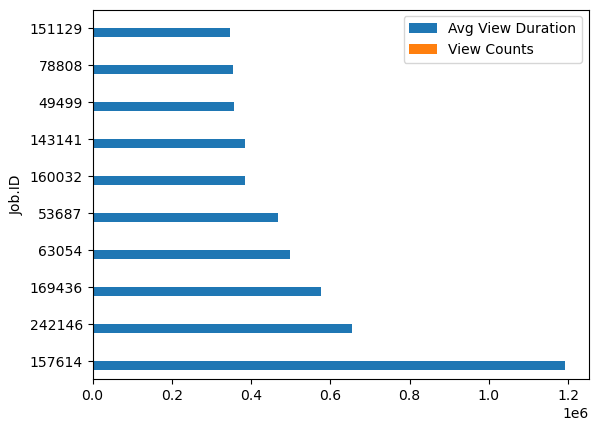

In [19]:
jobs_viewed_by_duration = job_views.groupby(['Job.ID']).agg({'View.Duration': ['mean', 'count']})
# Reset column names for easier access
jobs_viewed_by_duration.columns = ['Avg View Duration' ,'View Counts']
jobs_viewed_by_duration
jobs_viewed_by_duration = jobs_viewed_by_duration.sort_values(by='Avg View Duration', ascending=False)
jobs_viewed_by_duration \
.iloc[:10] \
.plot.barh();

## Positions which are most viewed by applicant's 

In [20]:
def jobs_positions_property_helper(col):
    # Group the DataFrame by 'Job category' and aggregate the 'Job position' column as a list
    df_grouped = job_views.groupby(['Job.ID'])[col].apply(list).reset_index()

    # Rename the aggregated column to 'Positions'
    #df_grouped.rename(columns={'Position': 'Positions'}, inplace=True)

    list_of_lists = df_grouped[df_grouped['Job.ID']\
                               .isin(jobs_viewed_by_duration.iloc[:10].index.values.tolist())][f'{col}']\
                                .values.tolist()
    flattened_list = [item for sublist in list_of_lists for item in sublist]
    flattened_list = list(set(flattened_list))
    
    return flattened_list

jobs_positions_property_helper('Position')

['Hotel Housekeeping Team Member',
 'CHARLOTTE CHILDREN S MINISTRY COORDINATOR',
 'Retail Sales Consultant',
 'Service Associate',
 'Part Time Telephone Research Interviewer',
 'T-Mobile Sales Representative',
 'ENTRY LEVEL MEDICAL TRANSCRIPTIONIST',
 'Certified Nursing Assistant CNA',
 'Dock Worker Part-Time',
 'Teller (PT)']

## Companies attract more applicant attention.
### missing values of Company in data

In [21]:
jobs_positions_property_helper('Company')

[nan,
 'Redemption World Outreach Center',
 'Princeton Data Source, LLC (PDS)',
 'Winn-Dixie',
 'Med Trans Inc.',
 'Union First Market Bank',
 'Holiday Inn- Independently Owned & Operated',
 'ABF Freight System, Inc',
 'Brookdale',
 'AT&T Retail']

## Applicants View Counts and View Duration of Job Posting

In [22]:
job_views_filt = jobs_viewed_by_duration.sort_values(by=['View Counts'], ascending=False)\
.loc[jobs_viewed_by_duration['View Counts'] > 10].reset_index()
job_views_filt

,Job.ID,Avg View Duration,View Counts
0,221890,164.058824,102
1,231297,573.430233,86
2,48285,3553.659091,44
3,153198,96.139535,43
4,153197,87946.947368,38
5,48200,41.027027,37
6,48284,411.638889,36
7,153199,184.121212,33
8,222383,18589.937500,32
9,227061,441.566667,30


## Distribution of View Duration for each position


### View duration of top 5 positions basis highest view counts


#### It's highly skewed



/Users/arjun/miniforge3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


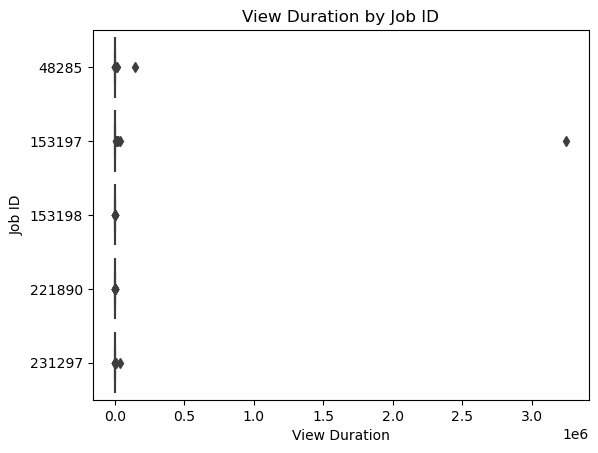

In [23]:
job_views_filt = job_views[job_views['Job.ID'].isin([221890, 231297,48285, 153198, 153197])]
job_views_filt['Job.ID'] = job_views_filt['Job.ID'].apply(str)
sns.boxplot(data=job_views_filt, x='View.Duration', y='Job.ID')
# Add scatter points using stripplot
#sns.stripplot(data=job_views_filt, x='View.Duration', y='Job.ID', color='black', jitter=True)

# Set the plot title and axes labels
plt.title('View Duration by Job ID')
plt.xlabel('View Duration')
plt.ylabel('Job ID')

# Show the plot
plt.show()

##  Let's take 2-3 job positions with similar range 

/Users/arjun/miniforge3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


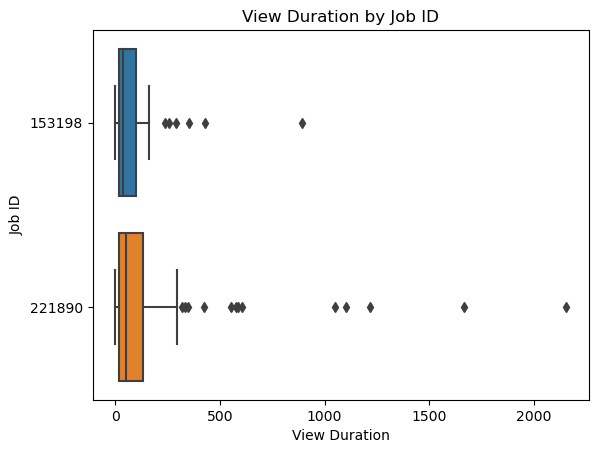

In [24]:
job_views_filt = job_views[job_views['Job.ID'].isin([221890, 153198])]
job_views_filt['Job.ID'] = job_views_filt['Job.ID'].apply(str)
sns.boxplot(data=job_views_filt, x='View.Duration', y='Job.ID')
# Add scatter points using stripplot
#sns.stripplot(data=job_views_filt, x='View.Duration', y='Job.ID', color='black', jitter=True)

# Set the plot title and axes labels
plt.title('View Duration by Job ID')
plt.xlabel('View Duration')
plt.ylabel('Job ID')

# Show the plot
plt.show()

# Positions of Interest

##  Identify popular job roles among the applicants.



In [25]:
list(experience)

['Applicant.ID',
 'Position.Name',
 'Employer.Name',
 'City',
 'State.Name',
 'State.Code',
 'Start.Date',
 'End.Date',
 'Job.Description',
 'Salary',
 'Can.Contact.Employer',
 'Created.At',
 'Updated.At']

In [26]:
position_preferences = positions_interest['Position.Of.Interest'].unique()

## Spellings can be incorrect, there can be similar positions


## Create a mapping to group similar positions and account for case sensitivity, spell errors based on fuzzy matching technique

In [27]:
from fuzzywuzzy import fuzz

def is_nan(x):
    return x != x

def create_position_mapping(raw_positions):
    mapping = {}
    
    for position in raw_positions:
        if is_nan(position):
            continue
        position = position.strip()
        found = False
        
        for key in mapping.keys():
            if fuzz.ratio(position.lower(), key.lower()) >= 90:
                mapping[key].append(position)
                found = True
                break
        
        if not found:
            mapping[position] = [position]
    
    return mapping



position_mapping = create_position_mapping(position_preferences)

# Print the mapping
for key, values in position_mapping.items():
    print(f"{key} - {', '.join(values)}")
    break



/Users/arjun/miniforge3/envs/py37/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


security officer - security officer, Security officer, Security Officer, security officer, Security Officer, SECURITY OFFICER


In [28]:
position_mapping['security'].append('securtiy')
position_mapping['photography'].append('photographer')

position_mapping.pop('photographer', None)
position_mapping.pop('securtiy', None)

['securtiy']

In [29]:
positions_interest['new_positions_of_interest'] = positions_interest['Position.Of.Interest'].map(lambda x: next((k for k, v in position_mapping.items() if x.strip().lower() in v), x) if not is_nan(x) else x)
positions_interest

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At,new_positions_of_interest
0,10003,security officer,2014-12-12 21:20:54 UTC,2014-12-12 21:20:54 UTC,security officer
1,10007,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Server
2,10007,Bartender,2014-08-14 15:56:44 UTC,2015-02-19 23:21:28 UTC,Bartender
3,10008,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Host
4,10008,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC,Barista
...,...,...,...,...,...
6555,9995,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Server
6556,9996,Security,2014-12-12 19:06:28 UTC,2014-12-12 19:06:28 UTC,security
6557,9997,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC,Server
6558,9997,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC,Barista


In [30]:
position_preference_counts = positions_interest['new_positions_of_interest'].value_counts()
position_preference_counts

Customer Service Rep         1109
Receptionist                 1071
Sales Rep                     556
Server                        531
Host                          524
                             ... 
houseman                        1
bookstore                       1
Baby Sister                     1
Home opportunities              1
Classroom based assistant       1
Name: new_positions_of_interest, Length: 672, dtype: int64

In [31]:
position_preference_df = position_preference_counts.to_frame('counts')
position_preference_df = position_preference_df.loc[position_preference_df['counts'] > 30]
position_preference_df['counts'].unique()

array([1109, 1071,  556,  531,  524,  495,  415,  186,  174,  134,   79,
         57,   56,   46,   33])

# Popular job roles

<Figure size 1000x600 with 0 Axes>

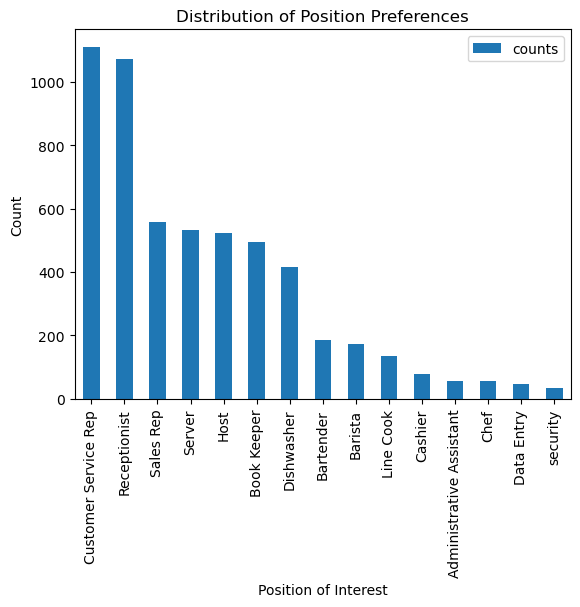

In [32]:
# Plot the position preference counts
plt.figure(figsize=(10, 6))
position_preference_df.plot(kind='bar')
plt.xlabel('Position of Interest')
plt.ylabel('Count')
plt.title('Distribution of Position Preferences')
plt.show()


# Applicant's salary distribution across positions of interest

In [33]:
merged_table_2_4 = experience.merge(positions_interest[['Applicant.ID', 'new_positions_of_interest']], on=['Applicant.ID'],  how='inner')
merged_table_2_4

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At,new_positions_of_interest
0,10003,maintenance technician,Winn residental,washington,District of Columbia,DC,NaN,NaN,"Necessary maintenance for ""Make Ready"" Plumbin...",10.00,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC,security officer
1,10003,Electrical Helper,michael and son services,alexandria,Virginia,VA,NaN,NaN,repair and services of electrical construction,NaN,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC,security officer
2,10003,technician,jiffy lube,district heights,Maryland,MD,NaN,NaN,"basic auto maintenance, and customer services ...",7.25,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC,security officer
3,10007,Bartender,Infusion Lounge,San Francisco,California,CA,2010-08-01,NaN,Support bar and management staff at a well-kno...,NaN,False,2014-12-12 23:01:04 UTC,2014-12-12 23:03:13 UTC,Server
4,10007,Bartender,Infusion Lounge,San Francisco,California,CA,2010-08-01,NaN,Support bar and management staff at a well-kno...,NaN,False,2014-12-12 23:01:04 UTC,2014-12-12 23:03:13 UTC,Bartender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10079,9997,Server/cocktail server/bartender,The River Room,New York,New York,NY,2008-08-01,2010-10-01,This was an establishment that majority of the...,25.00,True,2014-12-12 20:54:21 UTC,2014-12-12 20:54:21 UTC,Barista
10080,9997,Server/cocktail server/bartender,The River Room,New York,New York,NY,2008-08-01,2010-10-01,This was an establishment that majority of the...,25.00,True,2014-12-12 20:54:21 UTC,2014-12-12 20:54:21 UTC,Bartender
10081,9997,Server,24 Prince,New York,New York,NY,2008-01-01,2009-12-01,I was a server. This was a new american italia...,4.15,False,2014-12-12 20:54:21 UTC,2014-12-12 20:54:21 UTC,Server
10082,9997,Server,24 Prince,New York,New York,NY,2008-01-01,2009-12-01,I was a server. This was a new american italia...,4.15,False,2014-12-12 20:54:21 UTC,2014-12-12 20:54:21 UTC,Barista


In [34]:
job_attributes = merged_table_2_4[['Salary']]
positions_of_interest = merged_table_2_4['new_positions_of_interest']
employers = merged_table_2_4['Employer.Name']

In [35]:
# Define the number of desired salary groups
num_groups = 10

# Calculate the salary range for each group
salary_min = merged_table_2_4['Salary'].min()
salary_max = merged_table_2_4['Salary'].max()
salary_range = np.linspace(salary_min, salary_max, num_groups + 1)

# Group the salaries into the defined ranges
merged_table_2_4['SalaryGroup'] = pd.cut(merged_table_2_4['Salary'], salary_range)

# Create the contingency table
position_attribute_table = pd.crosstab(positions_of_interest, merged_table_2_4['SalaryGroup'])
position_attribute_table

SalaryGroup,"(0.01, 97.509]","(97.509, 195.008]","(195.008, 292.507]","(390.006, 487.505]","(487.505, 585.004]","(682.503, 780.002]","(780.002, 877.501]","(877.501, 975.0]"
new_positions_of_interest,,,,,,,,
Helping with Horses,2,0,0,0,0,0,0,0
10 keyer,1,0,0,0,0,0,0,0
77014,1,0,0,0,0,0,0,0
Accountant,2,0,0,0,0,0,0,0
Accounting Clerk,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
welder,3,0,0,0,0,0,0,0
work from home positions,3,0,0,0,0,0,0,0
working with children,2,0,0,0,0,0,0,0


In [36]:
position_attribute_table_cols = list(position_attribute_table)

<Figure size 5000x2000 with 0 Axes>

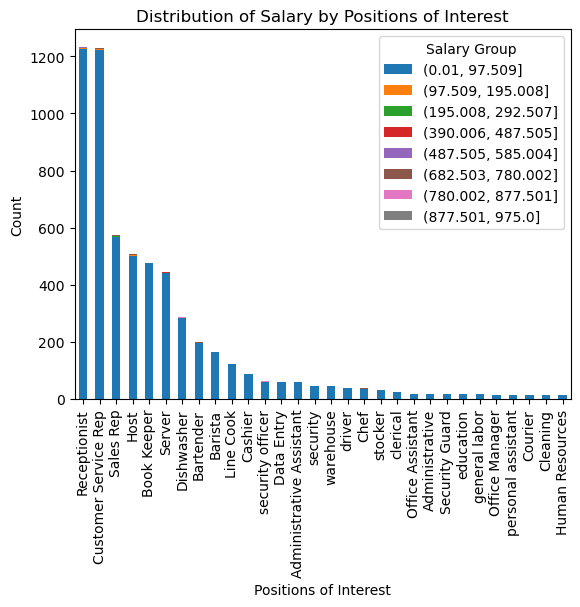

In [39]:

# Set the figure size
plt.figure(figsize=(50, 20))  # Adjust the width and height as needed

# Plot the bar chart
position_attribute_table.sort_values(by=position_attribute_table_cols[0], ascending=False).iloc[:30].plot(kind='bar', stacked=True)
plt.title('Distribution of Salary by Positions of Interest')
plt.xlabel('Positions of Interest')
plt.ylabel('Count')
plt.legend(title='Salary Group')

# Adjust the layout to accommodate the legend
#plt.tight_layout()

# Show the plot
plt.show()



<Figure size 5000x2000 with 0 Axes>

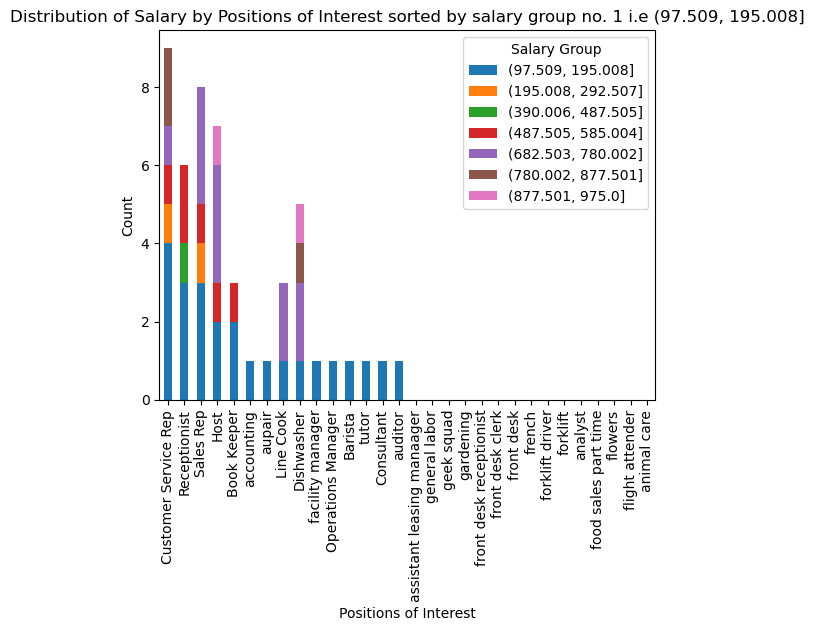

<Figure size 5000x2000 with 0 Axes>

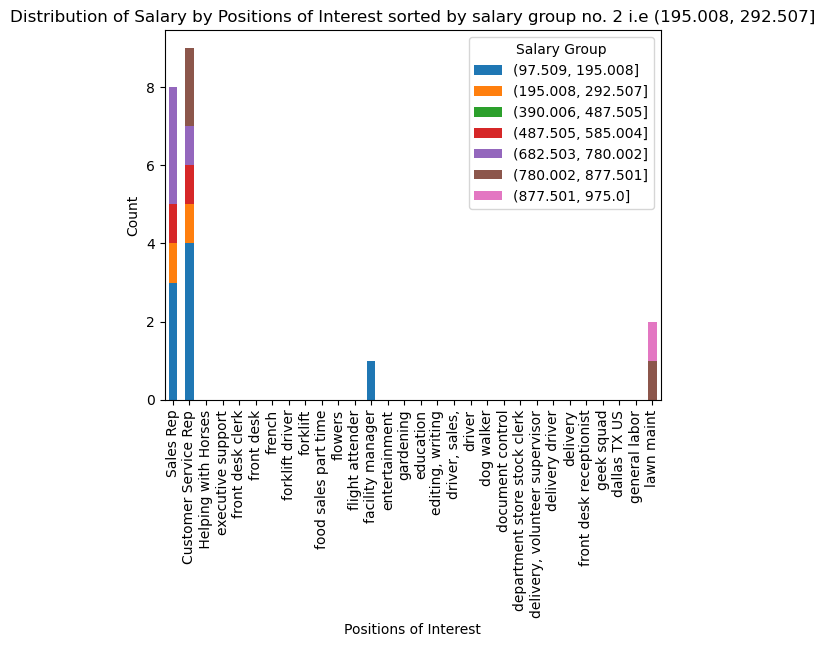

<Figure size 5000x2000 with 0 Axes>

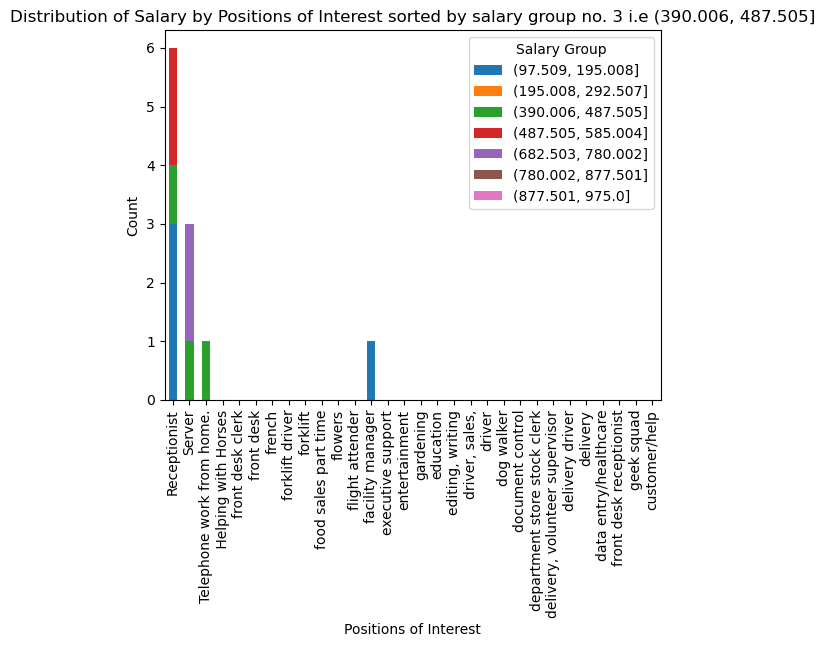

<Figure size 5000x2000 with 0 Axes>

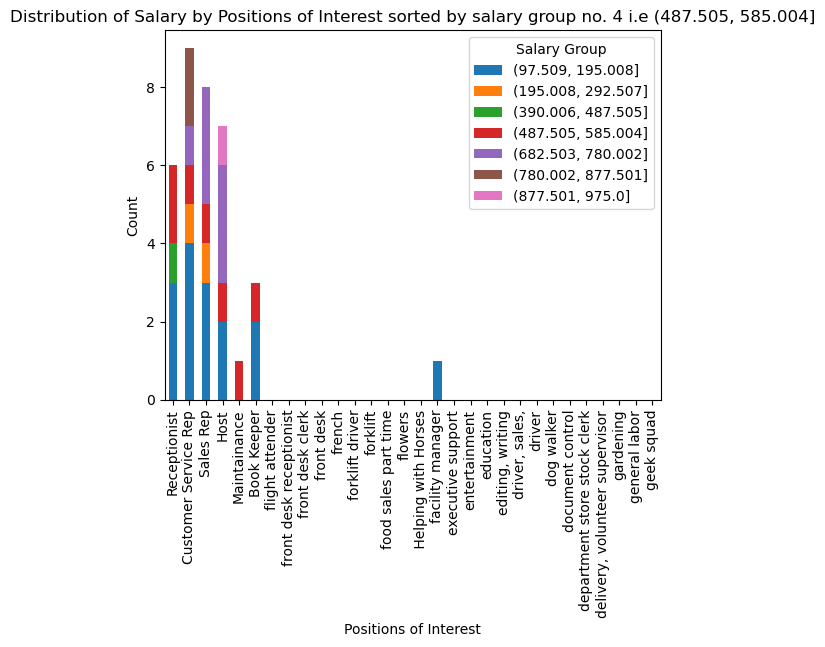

<Figure size 5000x2000 with 0 Axes>

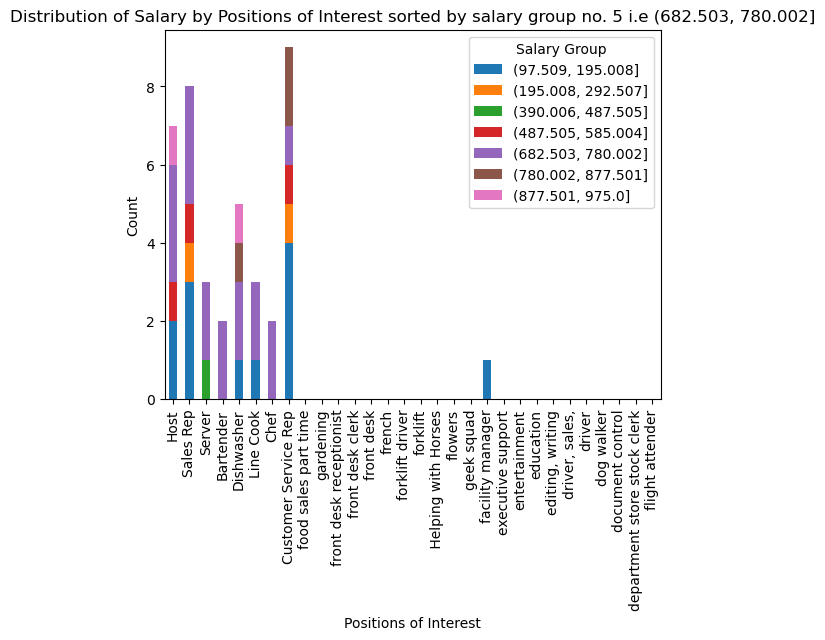

<Figure size 5000x2000 with 0 Axes>

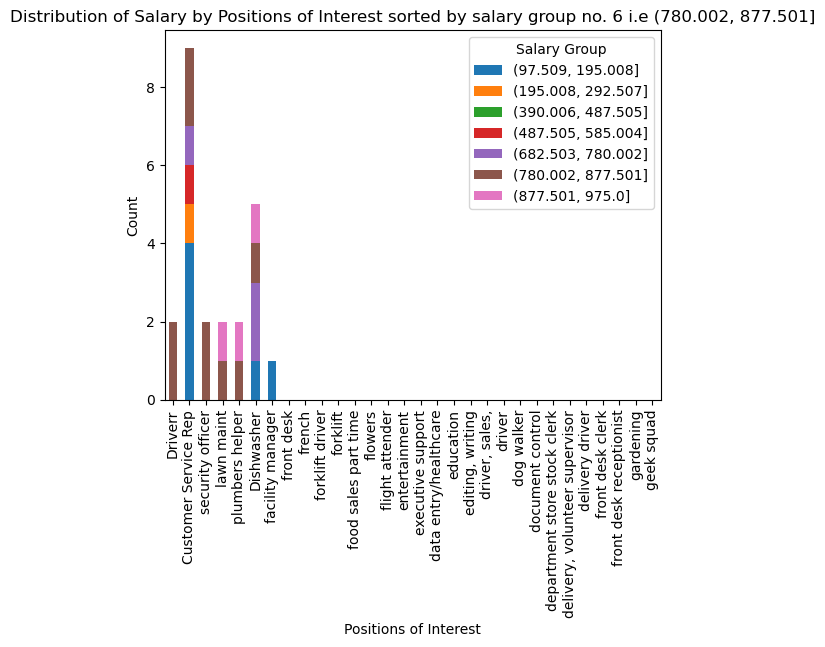

<Figure size 5000x2000 with 0 Axes>

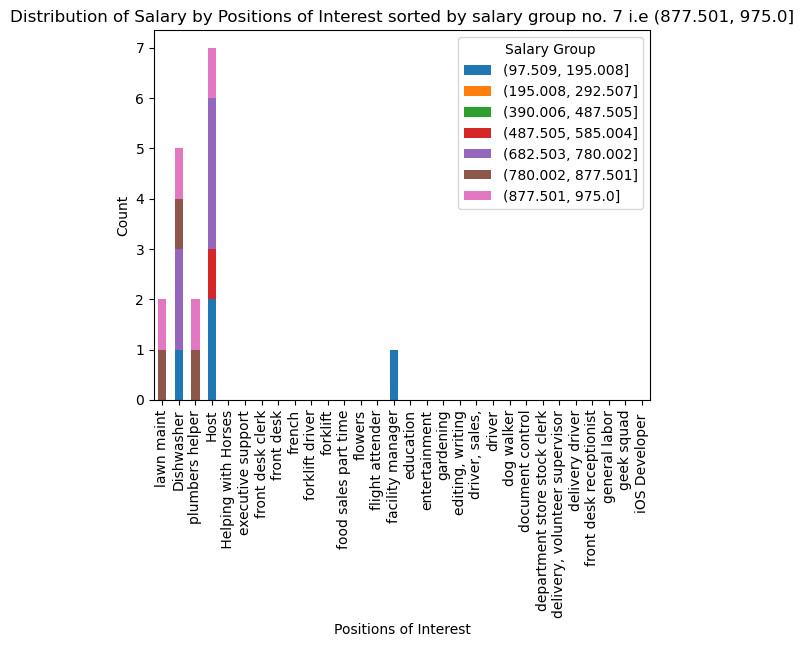

In [40]:
def plot_bar(idx, col):
    ### Set the figure size
    plt.figure(figsize=(50, 20))  # Adjust the width and height as needed

    # Plot the bar chart
    position_attribute_table.drop(position_attribute_table_cols[0], axis=1).sort_values(by=col, ascending=False).iloc[:30].plot(kind='bar', stacked=True)
    plt.title(f'Distribution of Salary by Positions of Interest sorted by salary group no. {idx} i.e {col}')
    plt.xlabel('Positions of Interest')
    plt.ylabel('Count')
    plt.legend(title='Salary Group')

    # Adjust the layout to accommodate the legend
    #plt.tight_layout()

    # Show the plot
    plt.show()
    

for idx, col in enumerate(position_attribute_table_cols[1:]):
    plot_bar(idx+1, col)